In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
dir=os.getcwd()
if not os.path.exists(dir):
    print(dir+'/ML-workshop/Regression')
    print('Directory does not exist')
else:
    print(dir)
    print('Directory exists')
for dirname, _, filenames in os.walk(dir):
    print(f'Directory: {dirname}')
    for filename in filenames:
        print(os.path.join(dirname, filename))


/Users/rishi/Documents/Analysis/ML-workshop/Regression
Directory exists
Directory: /Users/rishi/Documents/Analysis/ML-workshop/Regression
/Users/rishi/Documents/Analysis/ML-workshop/Regression/framingham.csv.xls
/Users/rishi/Documents/Analysis/ML-workshop/Regression/logistic_regression.ipynb


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [13]:
df = pd.read_csv("framingham.csv.xls")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [14]:
df.shape

(4238, 16)

In [15]:
df['TenYearCHD'].isnull().sum() 

0

In [16]:
# Verify opctions
df['TenYearCHD'].unique() 

array([0, 1])

In [17]:
# between CHD
df['TenYearCHD'].value_counts()

TenYearCHD
0    3594
1     644
Name: count, dtype: int64

In [19]:
df.dtypes 

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [21]:
df = df.fillna(df.mean(numeric_only=True))
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [22]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.00000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.02963,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.007075,0.500024,11.879230,0.16852,0.076587,0.462763,0.158316,44.326453,22.038097,11.910850,4.070953,12.025177,22.836603,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.00000,0.000000,1.000000,0.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.00000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


<Axes: >

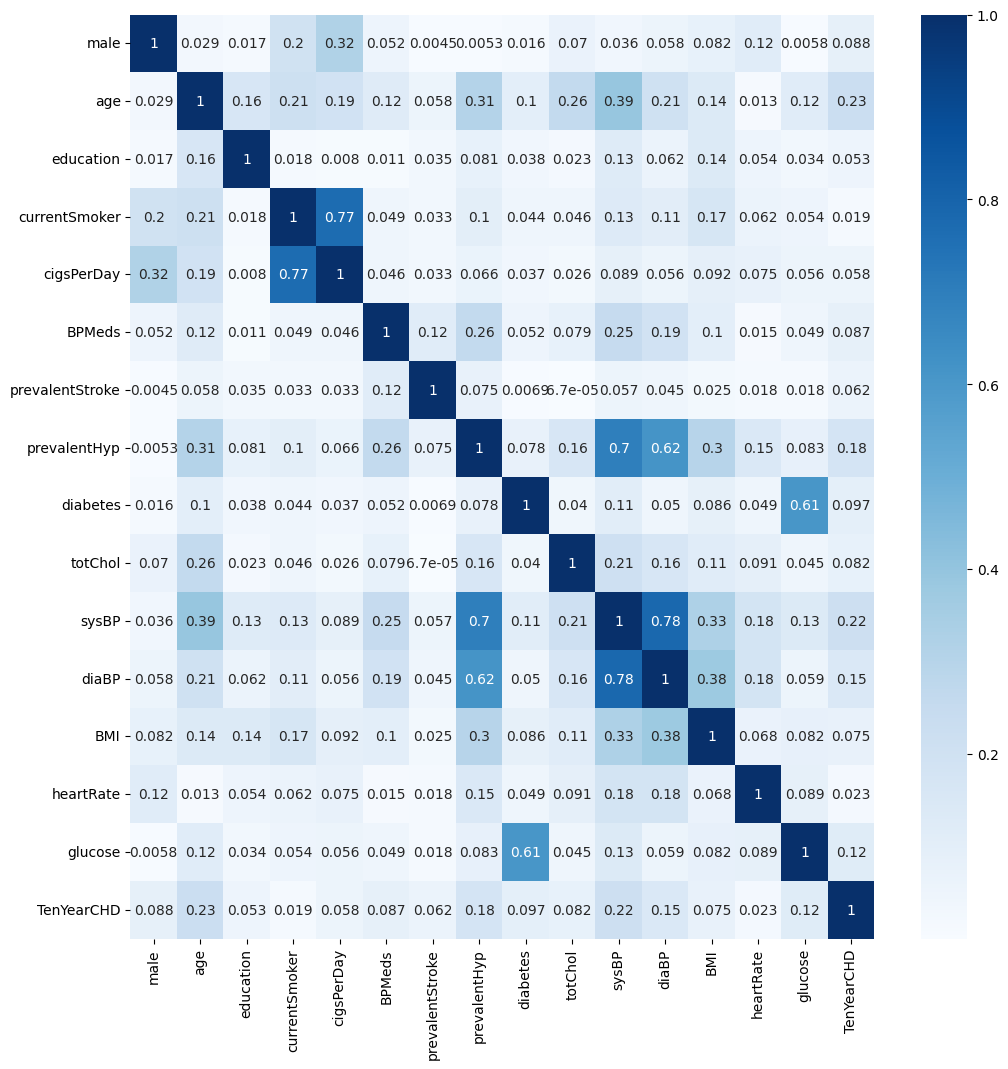

In [25]:
corr = df.select_dtypes('number').corr() 
fig, ax = plt.subplots(figsize=(12,12))  
sns.heatmap(corr.abs(), cmap='Blues', annot=True) #ou sns.heatmap(corr, cmap='Blues', annot=True) 

In [26]:
y = df['TenYearCHD']
X = df.drop('TenYearCHD', axis=1)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [29]:
# check how the distribution was
print(f'Features X_train: {X_train.shape}')
print(f'Features X_test: {X_test.shape}')
print(f'Features y_train: {y_train.shape}')
print(f'Features y_test: {y_test.shape}')

Features X_train: (3390, 15)
Features X_test: (848, 15)
Features y_train: (3390,)
Features y_test: (848,)


In [30]:
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_train

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.0,0.210526,1.000000,1.0,0.500000,0.0,0.0,0.0,0.0,0.166384,0.224586,0.358696,0.198740,0.214286,0.132768
1,0.0,0.657895,0.333333,0.0,0.000000,0.0,0.0,1.0,0.0,0.242784,0.326241,0.483696,0.406447,0.306122,0.152542
2,0.0,0.394737,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.208829,0.186761,0.250000,0.277266,0.387755,0.093220
3,1.0,0.236842,0.333333,1.0,0.500000,0.0,0.0,0.0,0.0,0.205433,0.139480,0.375000,0.245516,0.224490,0.084746
4,0.0,0.842105,0.000000,0.0,0.000000,0.0,0.0,1.0,0.0,0.212224,0.312057,0.391304,0.119971,0.234694,0.158192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,0.0,0.105263,0.000000,1.0,0.083333,0.0,0.0,1.0,0.0,0.195246,0.300236,0.500000,0.272661,0.316327,0.087571
3386,0.0,0.657895,0.666667,1.0,0.250000,0.0,0.0,0.0,0.0,0.242784,0.196217,0.282609,0.134270,0.357143,0.090395
3387,0.0,0.736842,0.333333,0.0,0.000000,0.0,0.0,1.0,0.0,0.324278,0.234043,0.445652,0.231459,0.387755,0.115819
3388,1.0,0.184211,0.333333,1.0,0.166667,0.0,0.0,0.0,0.0,0.183362,0.087470,0.179348,0.217159,0.234694,0.062147


In [31]:
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X.columns)
X_test

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.0,0.833333,0.000000,0.0,0.000000,0.0,0.0,1.0,0.0,0.219373,0.404389,0.400000,0.360959,0.325581,0.139394
1,1.0,0.333333,0.666667,0.0,0.000000,0.0,0.0,0.0,0.0,0.139601,0.260188,0.388571,0.390068,0.476744,0.130303
2,0.0,0.500000,0.000000,1.0,0.028571,0.0,0.0,0.0,0.0,0.421652,0.272727,0.297143,0.125000,0.360465,0.169697
3,1.0,0.333333,0.666667,1.0,0.428571,0.0,0.0,0.0,0.0,0.390313,0.266458,0.394286,0.414041,0.360465,0.157576
4,0.0,0.333333,0.333333,1.0,0.042857,0.0,0.0,0.0,0.0,0.390313,0.291536,0.285714,0.125000,0.534884,0.139394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,1.0,0.388889,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.415954,0.347962,0.274286,0.436644,0.302326,0.093939
844,1.0,0.305556,0.333333,0.0,0.000000,0.0,0.0,0.0,0.0,0.401709,0.291536,0.285714,0.395890,0.418605,0.103030
845,1.0,0.472222,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.481481,0.269592,0.377143,0.366781,0.476744,0.142424
846,1.0,0.861111,0.666667,0.0,0.000000,0.0,0.0,1.0,1.0,0.233618,0.579937,0.262857,0.284589,0.593023,1.000000


In [32]:
X_train.isnull().values.any()

False

In [35]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [36]:
y_pred = model.predict(X_test)
pd.Series(y_pred).value_counts()

0    824
1     24
Name: count, dtype: int64

In [37]:
print(f"Accuracy: {model.score(X_train, y_train)}")

Accuracy: 0.8545722713864307
